In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, BaggingClassifier, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier

from sklearn.ensemble import VotingClassifier, VotingRegressor

from sklearn.model_selection import GridSearchCV

data=pd.read_csv('/content/housing_prices.csv')

In [5]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Columns:price
price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64
Columns:area
area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64
Columns:bedrooms
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64
Columns:bathrooms
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64
Columns:stories
stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64
Columns:mainroad
mainroad
yes    468
no      77
Name: count, dtype: int64
Columns:guestroom
guestroom
no     448
yes     97
Name: count, dtype: int64
Columns:basement
basement
no     354
yes    191
Name: count, dtype: int64
Columns:hotwaterheating
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
Colu

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_b

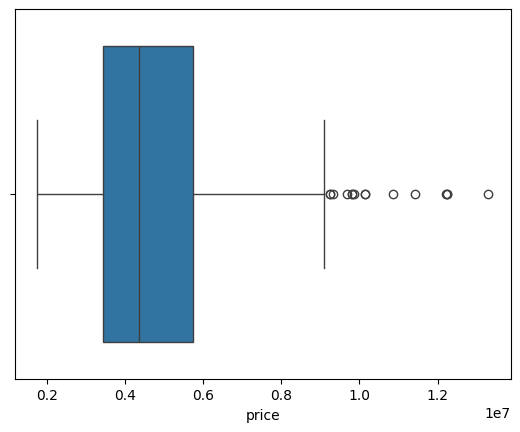

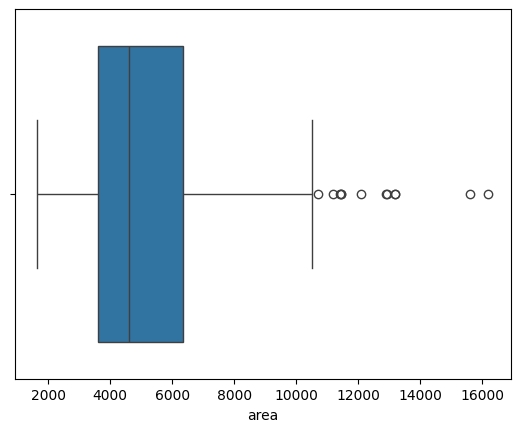

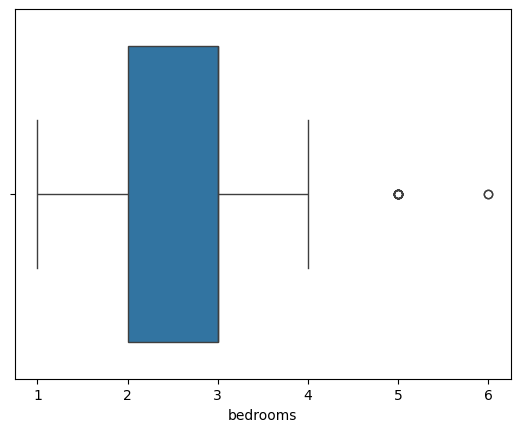

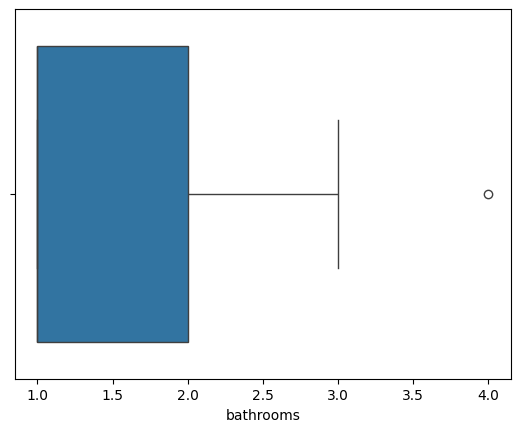

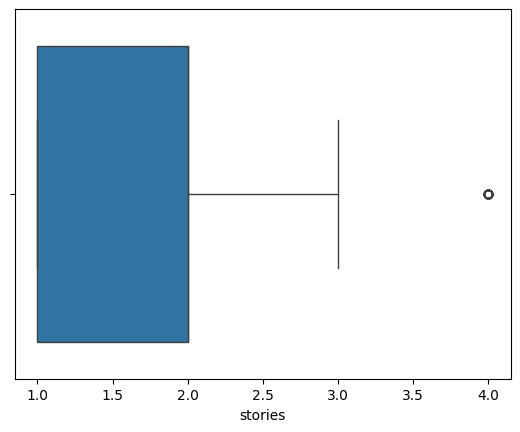

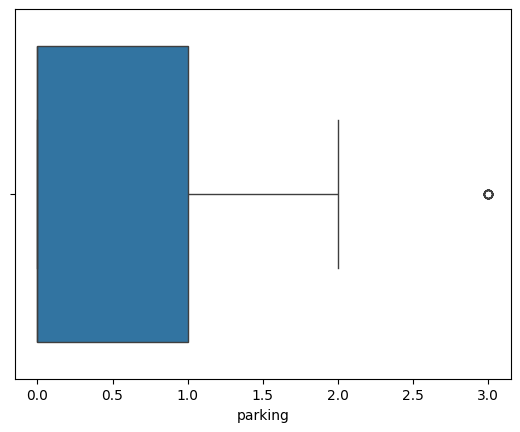

In [10]:
import seaborn as sns
for each in data.columns:
   print("Columns:{}".format(each))
   print(data[each].value_counts())

data1 = data.iloc[:,[0,1,2,3,4,10]]
for c in data1.columns:
   plt.figure()
   sns.boxplot(x = c, data= data, orient = "v")


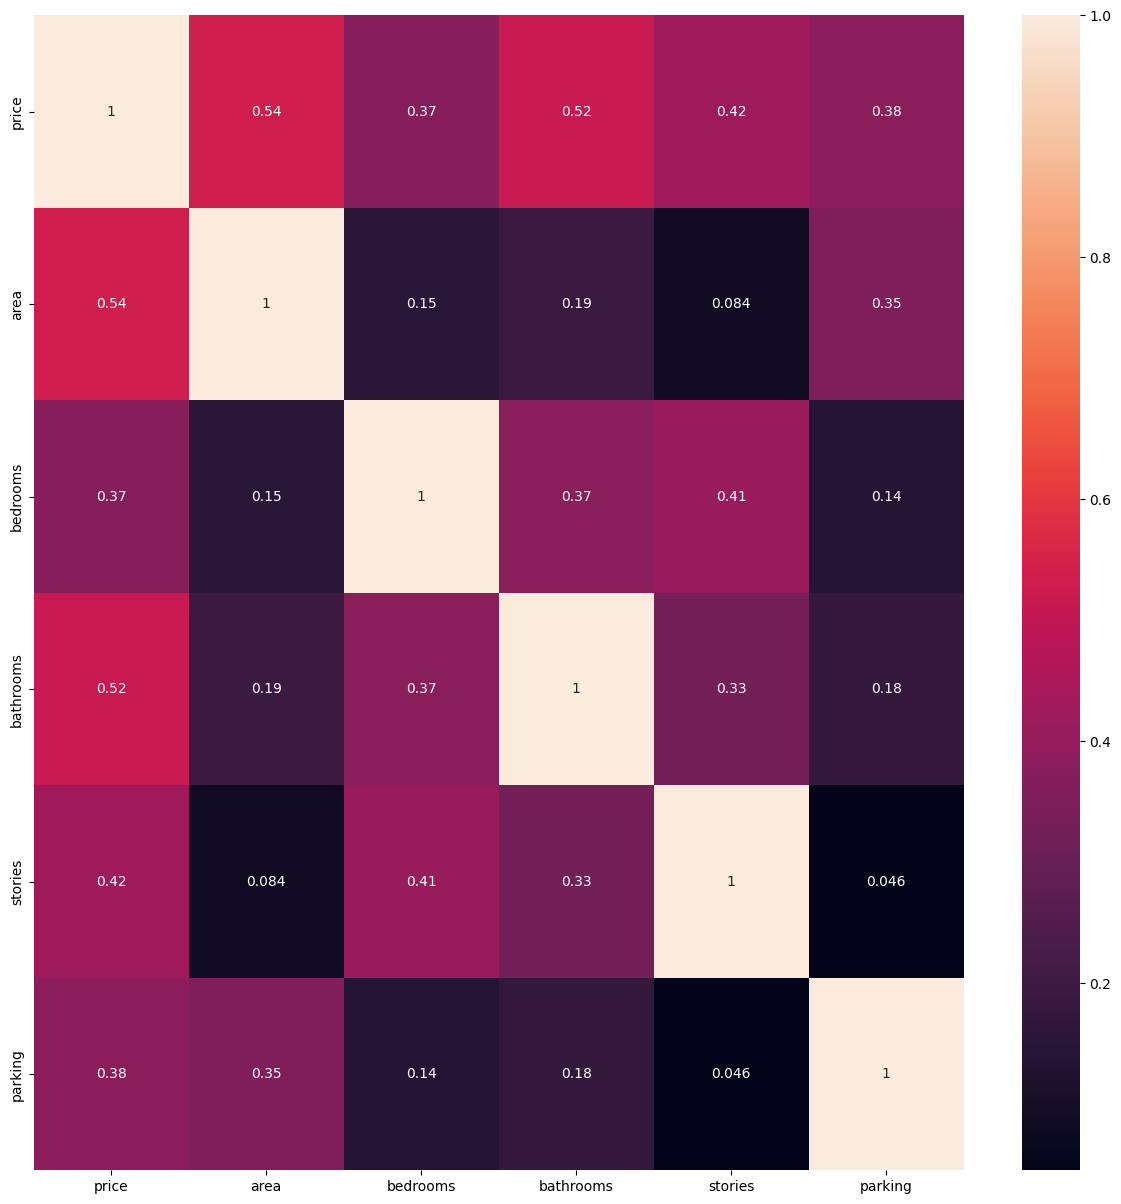

In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Select only numeric columns for correlation analysis
# numeric_data = data.select_dtypes(include=['float64', 'int64'])

# # Create a figure with a specific size
# plt.figure(figsize=(15, 15))

# # Generate the heatmap of correlations
# sns.heatmap(numeric_data.corr(), annot=True)

# # Display the plot
# plt.show()


In [15]:
y = data["price"]
x = data.drop(["price"],axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)


In [16]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
126,7160,3,1,1,yes,no,yes,no,no,2,yes,unfurnished
363,3584,2,1,1,yes,no,no,yes,no,0,no,semi-furnished
370,4280,2,1,1,yes,no,no,no,yes,2,no,semi-furnished
31,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
113,9620,3,1,1,yes,no,yes,no,no,2,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
106,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
435,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [17]:
y_train

126    5880000
363    3710000
370    3640000
31     8400000
113    6083000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 381, dtype: int64

In [19]:
data[data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [21]:
data.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# ENCODING PROCESS


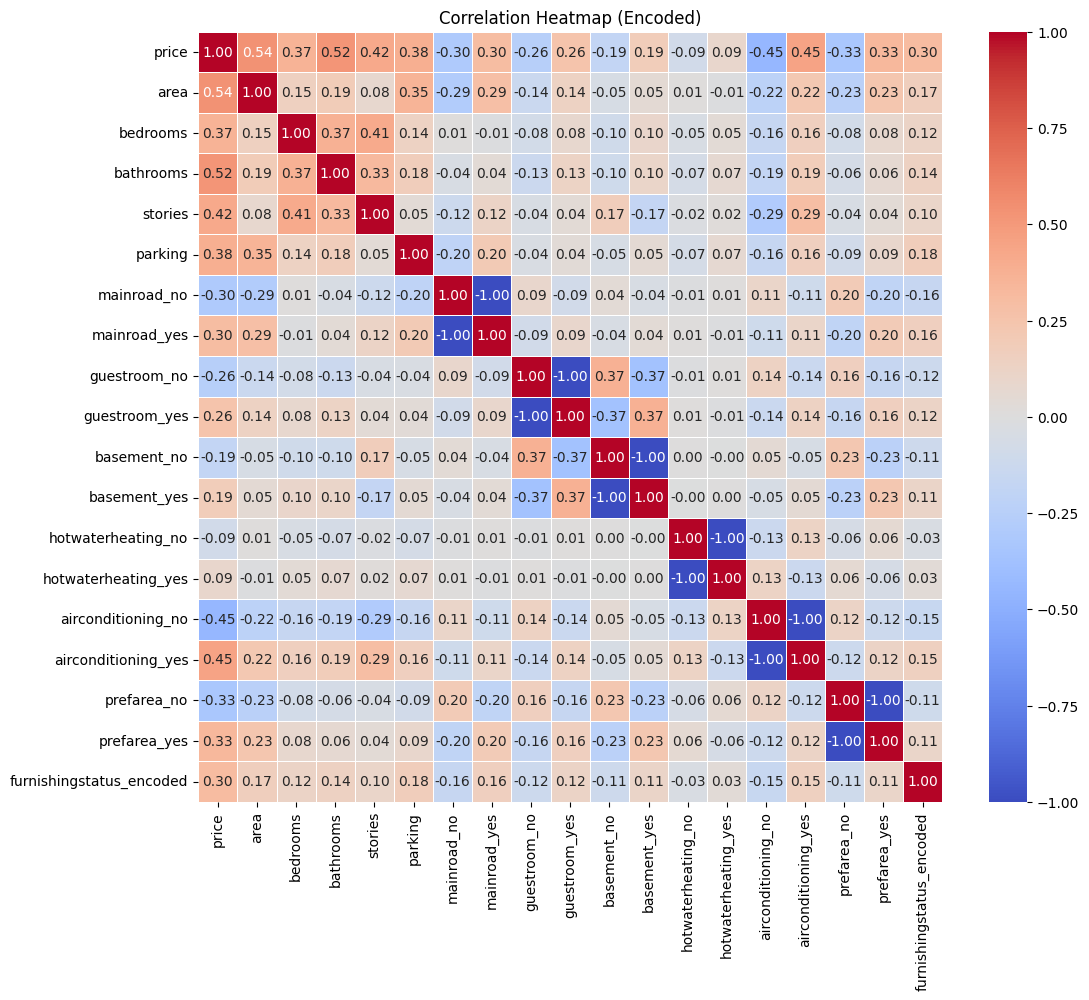

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

encoded_df = data.copy()

encoded_df = pd.get_dummies(encoded_df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'])

encoded_df['furnishingstatus_encoded'] = encoded_df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

encoded_df.drop('furnishingstatus', axis=1, inplace=True)

corr_matrix_encoded = encoded_df.corr()
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Encoded)')
plt.show()


# `**MODEL EVALUTION**`

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = encoded_df.drop(columns=['price'])
y = encoded_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


r_squared = r2_score(y_test, y_pred)
print("R-squared (R^2) score:", r_squared)



Mean Squared Error: 1771751116594.0325
Mean Absolute Error (MAE): 979679.6912959905
R-squared (R^2) score: 0.6494754192267809


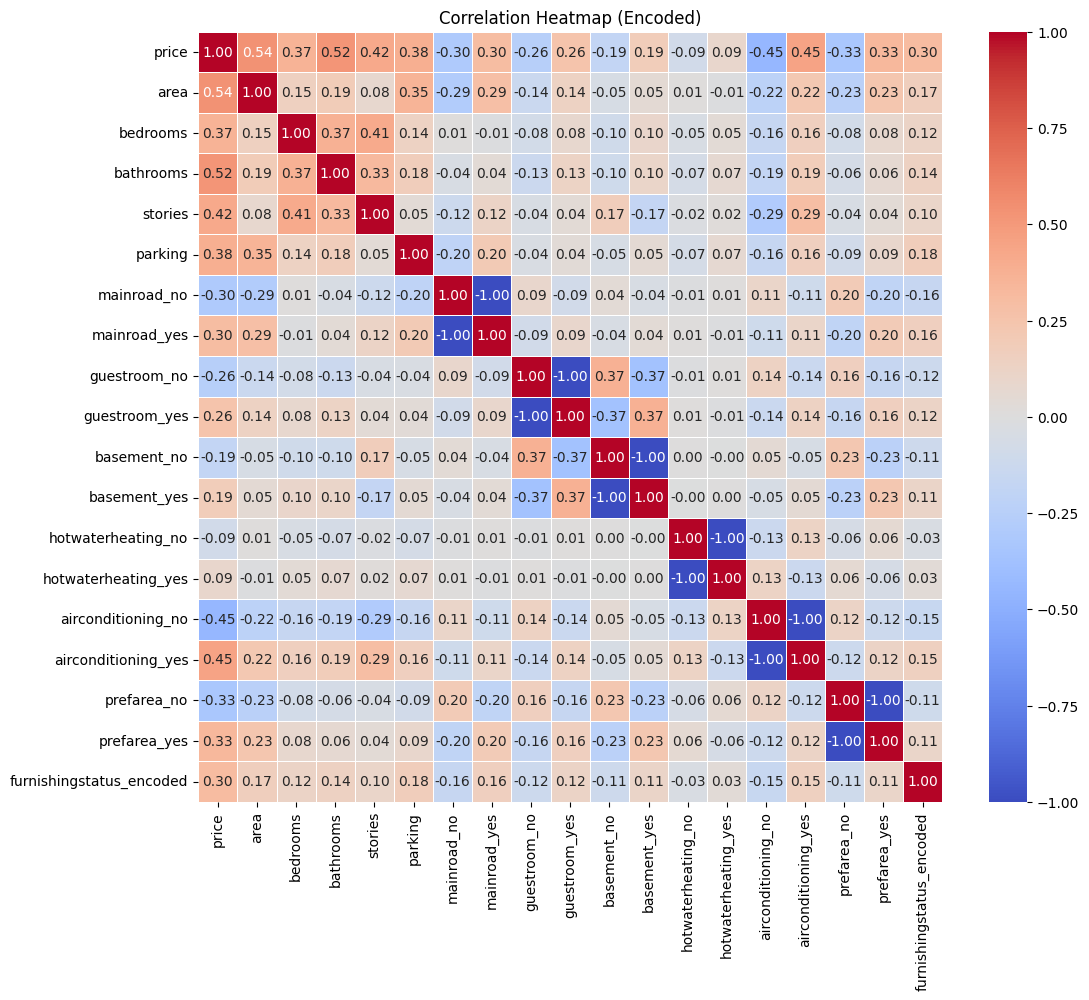

In [31]:
# Ploting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Encoded)')
plt.show()


In [37]:
# encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_encoded
0,13300000,7420,4,2,3,2,False,True,True,False,True,False,True,False,False,True,False,True,2
1,12250000,8960,4,4,4,3,False,True,True,False,True,False,True,False,False,True,True,False,2
2,12250000,9960,3,2,2,2,False,True,True,False,False,True,True,False,True,False,False,True,1
3,12215000,7500,4,2,2,3,False,True,True,False,False,True,True,False,False,True,False,True,2
4,11410000,7420,4,1,2,2,False,True,False,True,False,True,True,False,False,True,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,True,False,False,True,True,False,True,False,True,False,0
541,1767150,2400,3,1,1,0,True,False,True,False,True,False,True,False,True,False,True,False,1
542,1750000,3620,2,1,1,0,False,True,True,False,True,False,True,False,True,False,True,False,0
543,1750000,2910,3,1,1,0,True,False,True,False,True,False,True,False,True,False,True,False,2


In [44]:
# x_test,y_test,x_train

(     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 316  5900         4          2        2       no        no      yes   
 77   6500         3          2        3      yes        no       no   
 360  4040         2          1        1      yes        no       no   
 90   5000         3          1        2      yes        no       no   
 493  3960         3          1        1      yes        no       no   
 ..    ...       ...        ...      ...      ...       ...      ...   
 395  3600         6          1        2      yes        no       no   
 425  3185         2          1        1      yes        no      yes   
 195  4410         4          3        2      yes        no      yes   
 452  9000         3          1        2      yes        no       no   
 154  3650         3          2        2      yes        no       no   
 
     hotwaterheating airconditioning  parking prefarea furnishingstatus  
 316              no              no        1       no      

In [45]:
# x_test,y_test,x_train,y_train

(     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 316  5900         4          2        2       no        no      yes   
 77   6500         3          2        3      yes        no       no   
 360  4040         2          1        1      yes        no       no   
 90   5000         3          1        2      yes        no       no   
 493  3960         3          1        1      yes        no       no   
 ..    ...       ...        ...      ...      ...       ...      ...   
 395  3600         6          1        2      yes        no       no   
 425  3185         2          1        1      yes        no      yes   
 195  4410         4          3        2      yes        no      yes   
 452  9000         3          1        2      yes        no       no   
 154  3650         3          2        2      yes        no       no   
 
     hotwaterheating airconditioning  parking prefarea furnishingstatus  
 316              no              no        1       no      

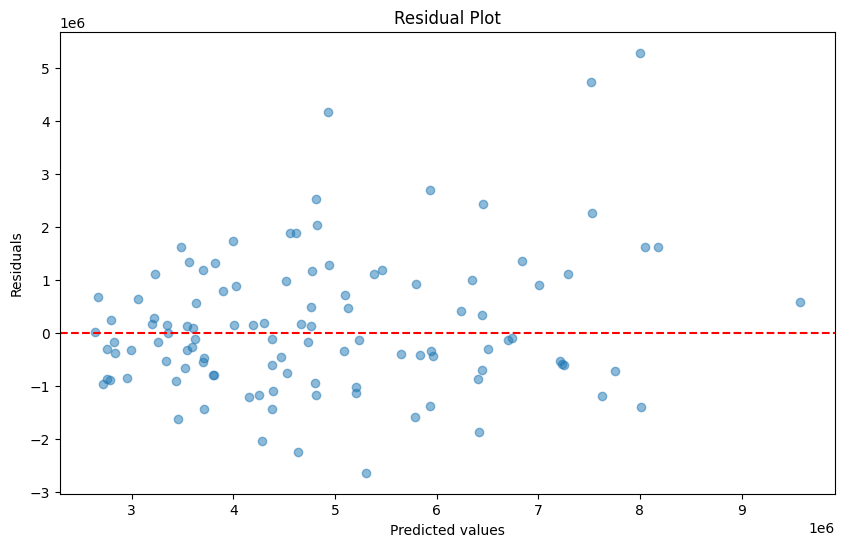

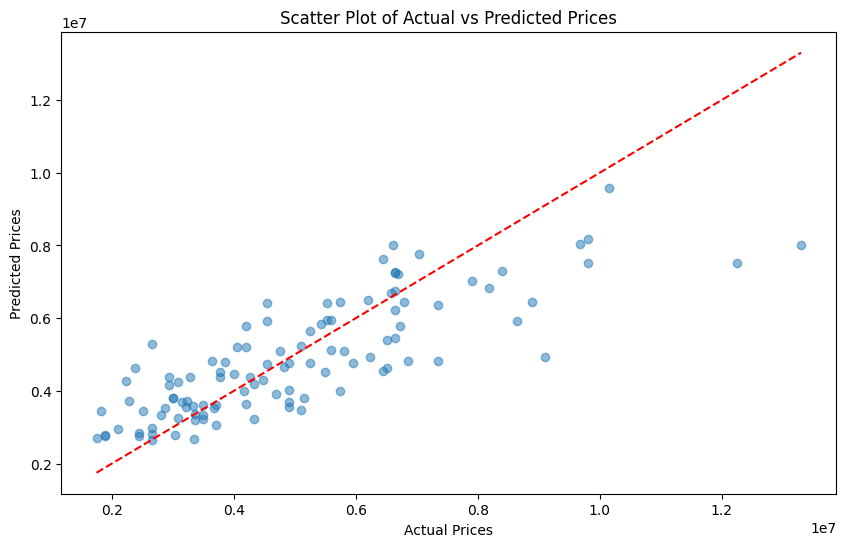

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [47]:
y = data["price"]
x = data.drop(["price"],axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)


In [48]:
from sklearn import preprocessing

categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])


In [49]:
stdandard_scale = preprocessing.StandardScaler()

X_train = stdandard_scale.fit_transform(x_train)
X_test = stdandard_scale.transform(x_test)


In [50]:
ElasticNet_reg = ElasticNet(alpha = 0.01)
ElasticNet_reg.fit(X_train,y_train)


ElasticNet(alpha=0.01)

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np



In [53]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}


In [54]:

mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []


In [55]:

for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2: {r2:.4f}")
    print("-" * 40)


Model: Linear Regression
MAE: 925543.5483
MSE: 1535047758428.0508
RMSE: 1238970.4429
R^2: 0.6435
----------------------------------------
Model: Ridge Regression
MAE: 925363.4425
MSE: 1534942765426.3865
RMSE: 1238928.0711
R^2: 0.6436
----------------------------------------
Model: Lasso Regression
MAE: 925543.5824
MSE: 1535048368302.8362
RMSE: 1238970.6890
R^2: 0.6435
----------------------------------------
Model: Decision Tree
MAE: 1254599.3293
MSE: 3462036077171.3413
RMSE: 1860654.7442
R^2: 0.1961
----------------------------------------
Model: Random Forest
MAE: 958148.9409
MSE: 1845766996104.0359
RMSE: 1358590.0766
R^2: 0.5714
----------------------------------------
Model: Support Vector Regression
MAE: 1578104.1027
MSE: 4462179323913.2793
RMSE: 2112387.1151
R^2: -0.0362
----------------------------------------
Model: K-Nearest Neighbors
MAE: 924445.3537
MSE: 1724119008477.6340
RMSE: 1313057.1231
R^2: 0.5996
----------------------------------------


In [60]:


scores_df = pd.DataFrame({
    'Model': list(models.keys()),
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R^2': r2_scores
})





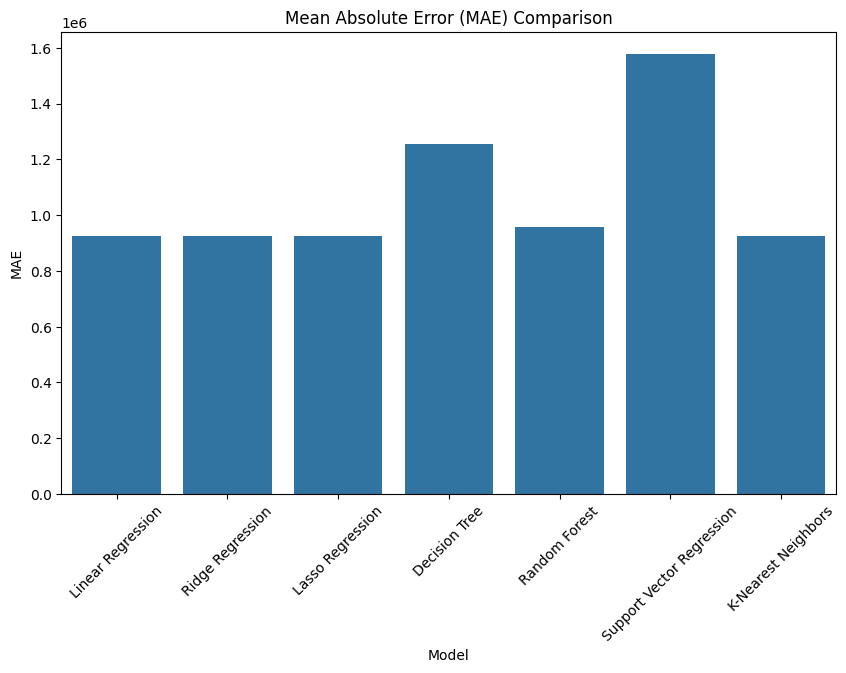

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=scores_df)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xticks(rotation=45)
plt.show()


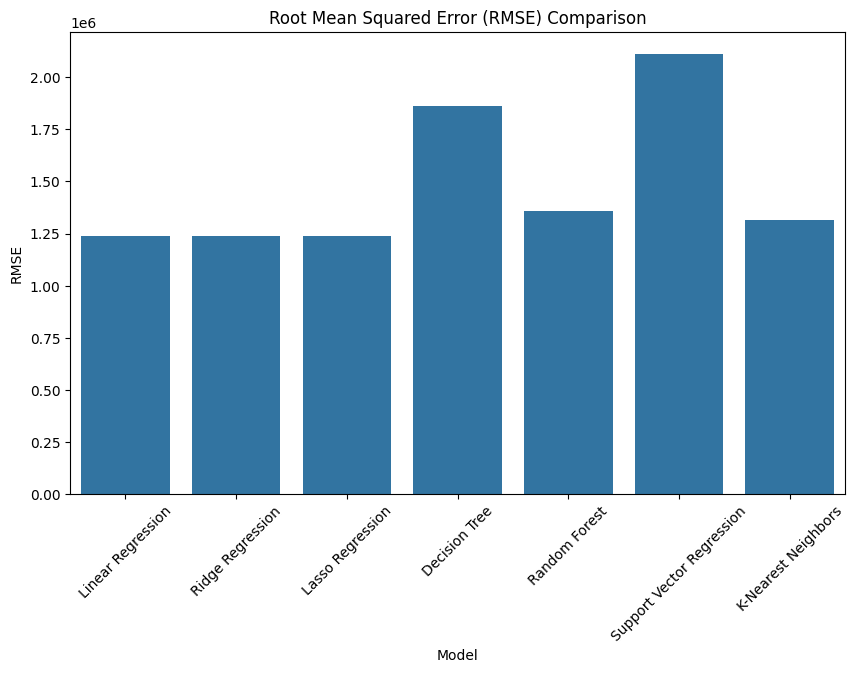

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=scores_df)
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xticks(rotation=45)
plt.show()


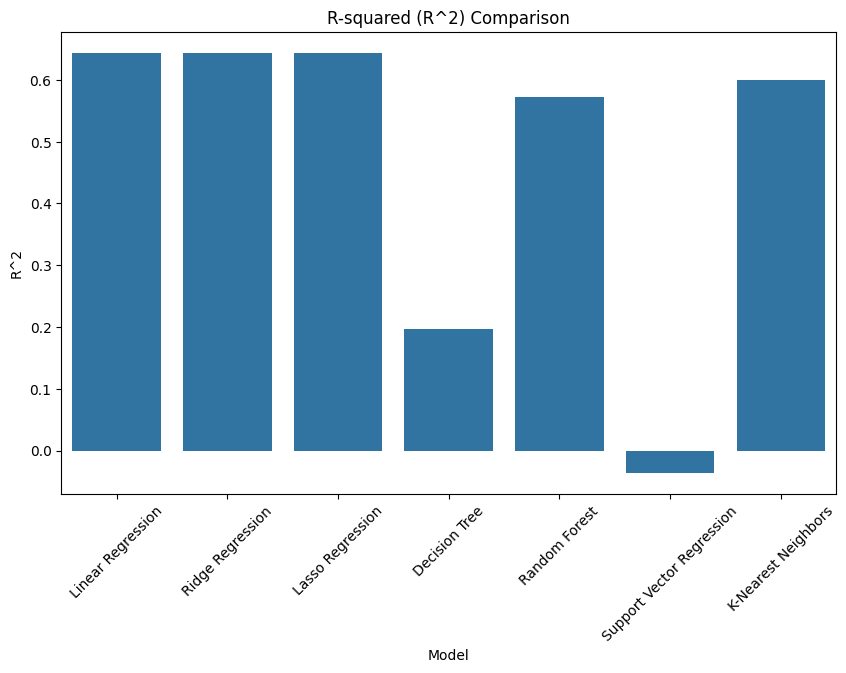

In [57]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2', data=scores_df)
plt.title('R-squared (R^2) Comparison')
plt.xticks(rotation=45)
plt.show()